Goal
===

Build a predictive model that is able to predict the average mood of the user on the next day based on the data we obtained from the user on the days before.

Exploration
===

In [89]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,5]

In [4]:
dateparse=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
df=pd.read_csv('dataset_mood_smartphone.csv', 
               header=1, 
               names=['uid','patient','time','variable','value'], 
               parse_dates=['time'], 
               date_parser=dateparse)

In [5]:
df.sample(10)

,uid,patient,time,variable,value
274152,345361,AS14.17,2014-04-22 13:45:41.043,appCat.communication,5.016
204835,166840,AS14.27,2014-04-23 15:58:01.062,appCat.builtin,16.269
111437,111439,AS14.27,2014-04-08 07:32:01.154,screen,1.334
4346,4348,AS14.27,2014-04-03 18:00:00.000,mood,7.000
41834,41836,AS14.01,2014-04-03 20:33:57.535,screen,24.437
330128,580607,AS14.17,2014-04-30 23:18:33.447,appCat.entertainment,4.013
172168,1000651,AS14.14,2014-03-28 14:22:56.746,appCat.builtin,4.051
16006,16008,AS14.29,2014-04-04 18:00:00.000,circumplex.valence,1.000
63235,63237,AS14.07,2014-03-23 11:42:33.736,screen,178.702
95091,95093,AS14.23,2014-03-29 12:11:52.984,screen,19.877


In [6]:
# how many patients?
df.patient.unique().size

27

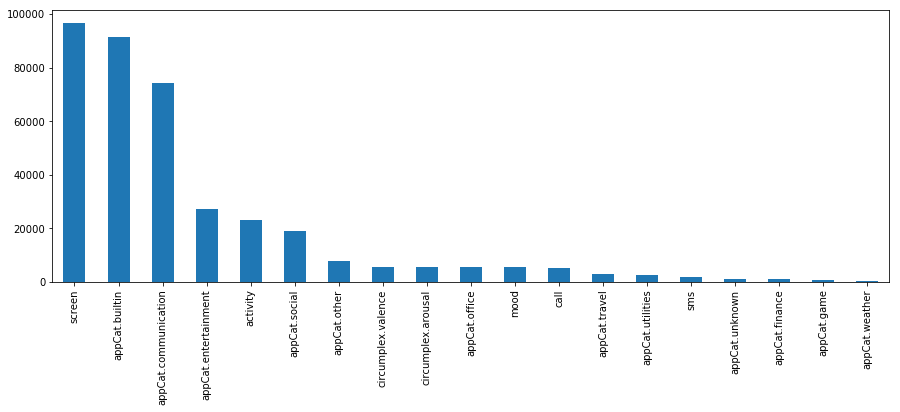

In [7]:
# which are the popular variables?
pd.DataFrame(df.variable.value_counts()).plot.bar(legend=None);

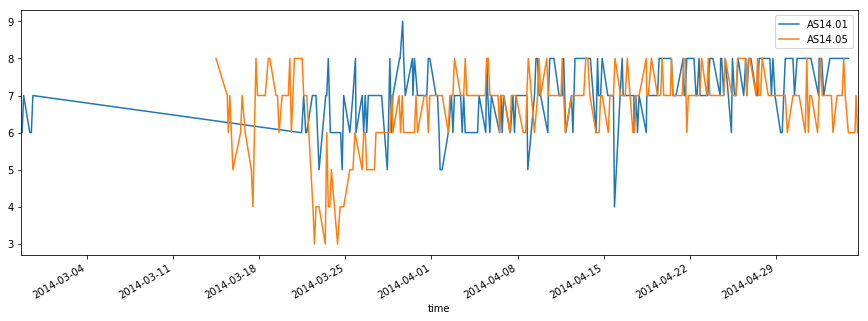

In [8]:
#look at a couple of patients' mood over time
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.01','AS14.05'])) & (df.variable=='mood')].groupby(['patient']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key)
plt.show()

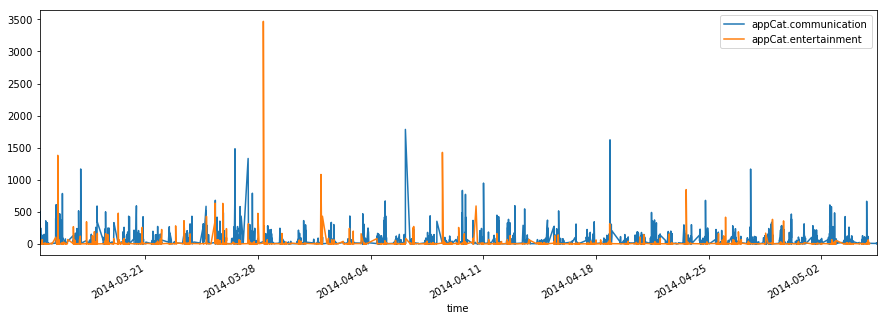

In [9]:
# look at the usage of a couple of apps of that patient with the dropped mood
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.05'])) & (df.variable.isin(['appCat.entertainment','appCat.communication']))].groupby(['variable']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key)
plt.show()

Task 1: Pre-process the dataset
===

In [50]:
# calculate moving average as described in task1
preprod=df.pivot_table(index=[df.patient, df.time], columns='variable', values='value')\
        .unstack(level=[0])\
        .resample("1d").mean()\
        .rolling(window=5, min_periods=1).mean()\
        .stack(level=[1])\
        .swaplevel(1,0)

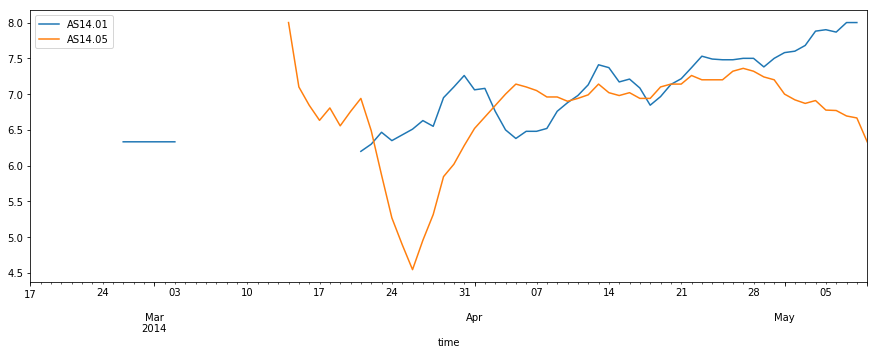

In [90]:
#look again at a couple of patients' mood over time
for patient in ('AS14.01','AS14.05'):
    preprod.loc[patient]['mood'].plot(label=patient)
plt.legend()

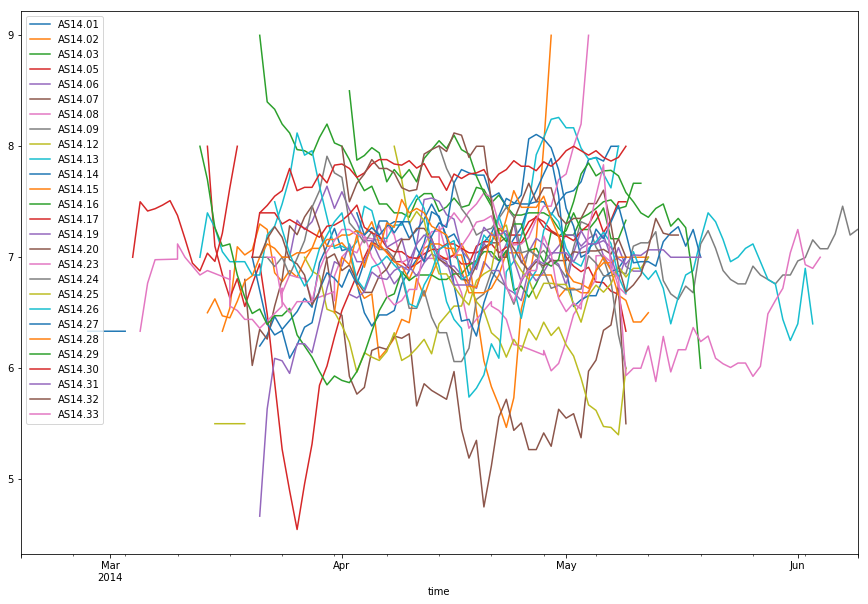

In [91]:
#look again at a couple of patients' mood over time
plt.rcParams["figure.figsize"] = [15,10]
for patient in preprod.index.levels[0]:
    preprod.loc[patient]['mood'].plot(label=patient)
plt.legend();